In [60]:
# Applied Data Science
# Milestone 2 - Project 2 Draft Assignment

## Step 1: Import Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Step 2: Load Data

In [5]:
# Loading data from CSV file named 'Online Learning Dataset.csv'
df = pd.read_csv('Online Learning Dataset.csv')
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,6-Mar,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,3-Jan,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,3-Jan,No,Mobile,Moderate
3,Girl,15-Nov,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,3-Jan,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,3-Jan,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,6-Mar,No,Mobile,Moderate
1202,Boy,15-Nov,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,3-Jan,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,3-Jan,No,Mobile,Low


## Step 3: Understanding Dataset

In [6]:
df.shape
# 1205 Rows and 14 Columns

(1205, 14)

In [7]:
df.head()
# Visualize data, including columns

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,6-Mar,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,3-Jan,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,3-Jan,No,Mobile,Moderate
3,Girl,15-Nov,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,3-Jan,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [10]:
df.describe()
# Statistical summary of the data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,3-Jan,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [11]:
df.info()
# Summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [12]:
print(df.isnull().sum())
# Check for missing values

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64


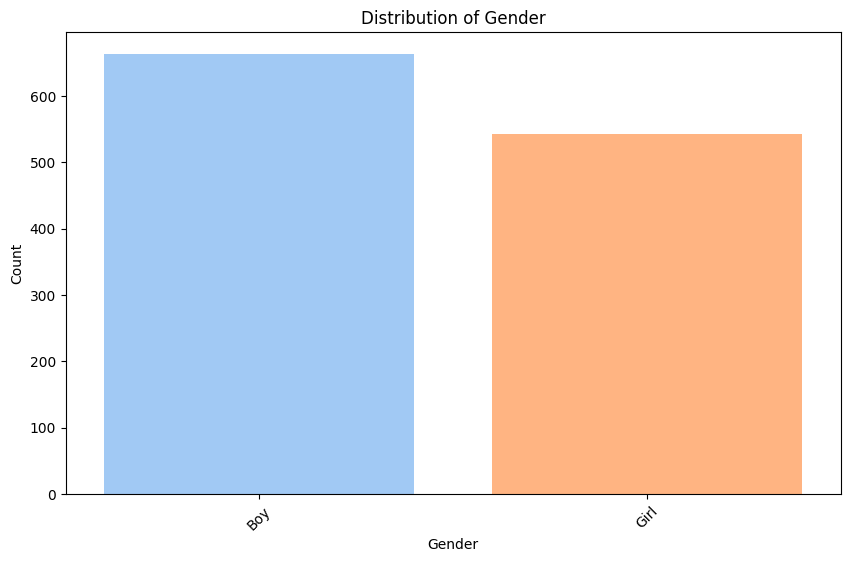

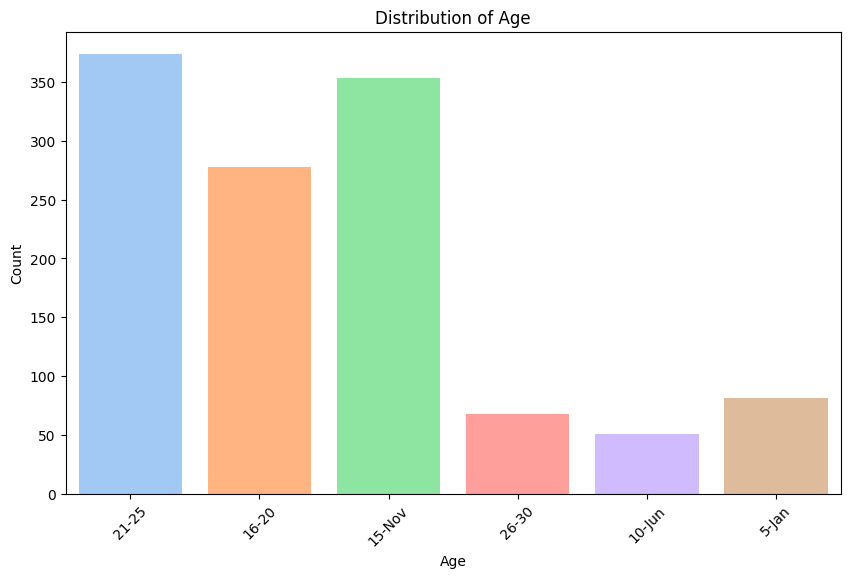

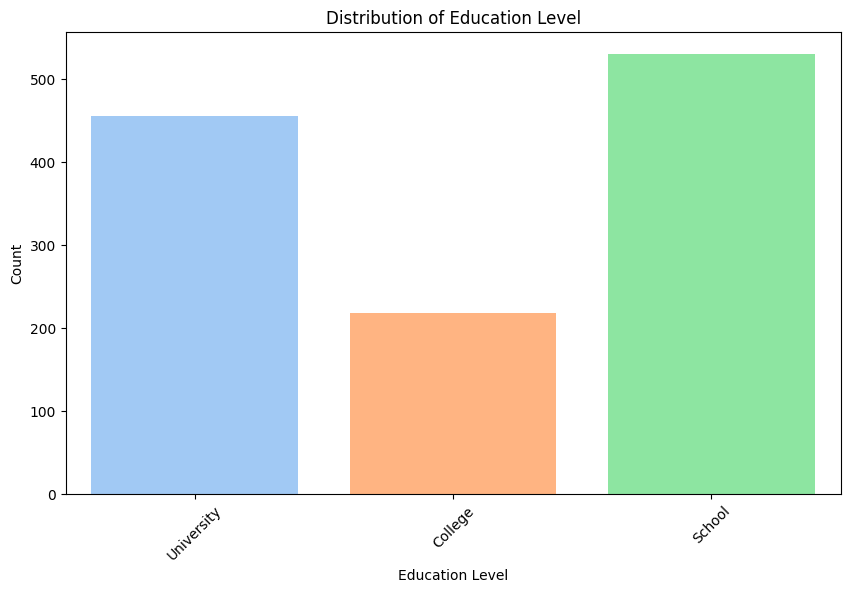

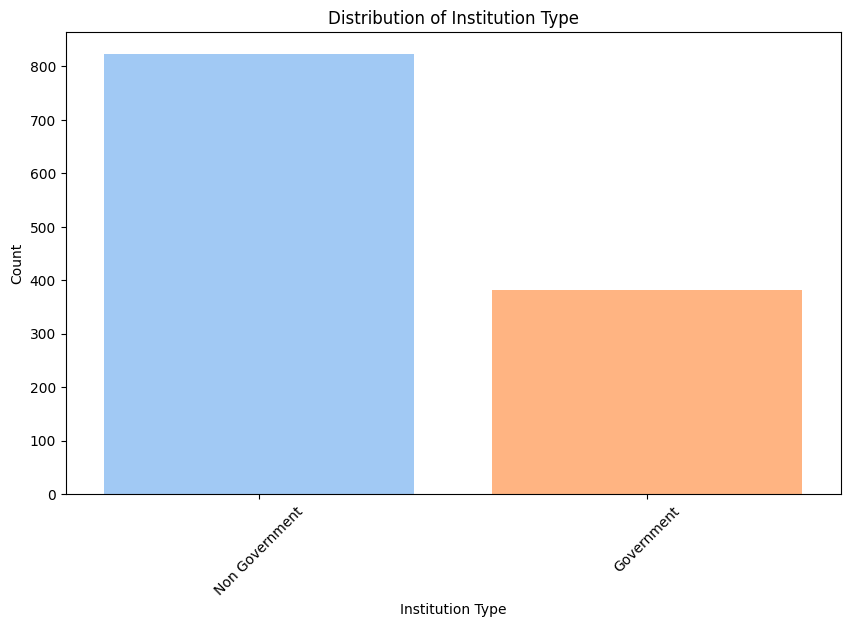

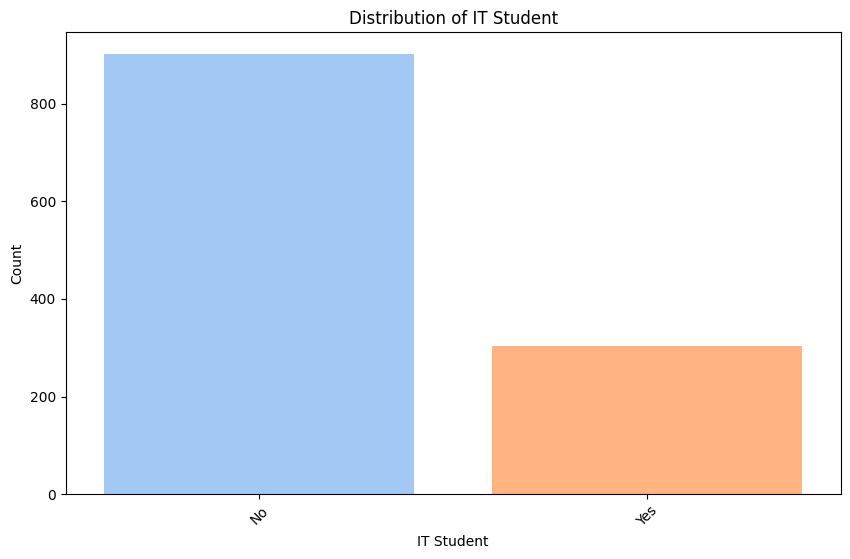

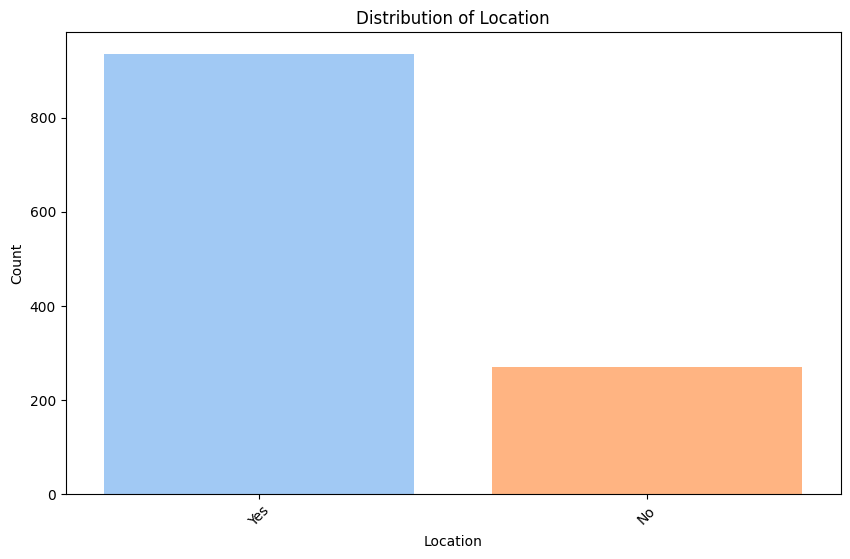

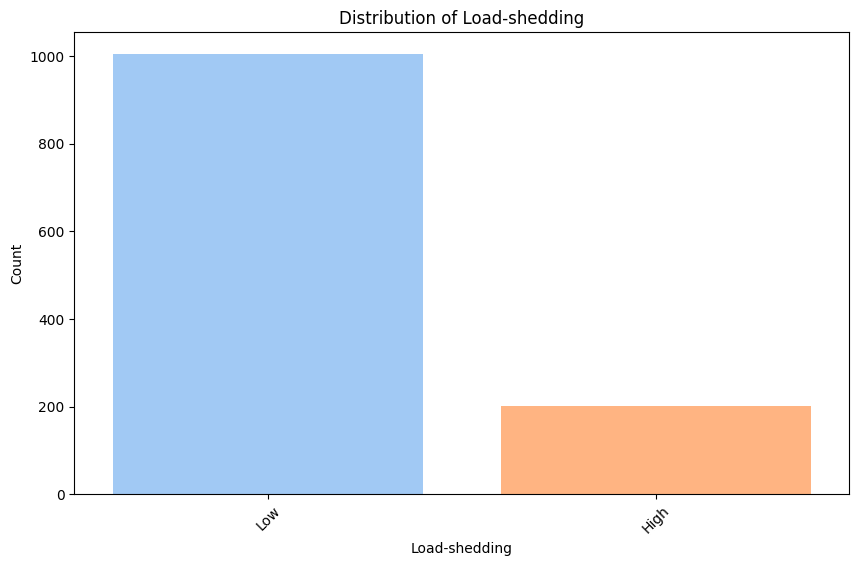

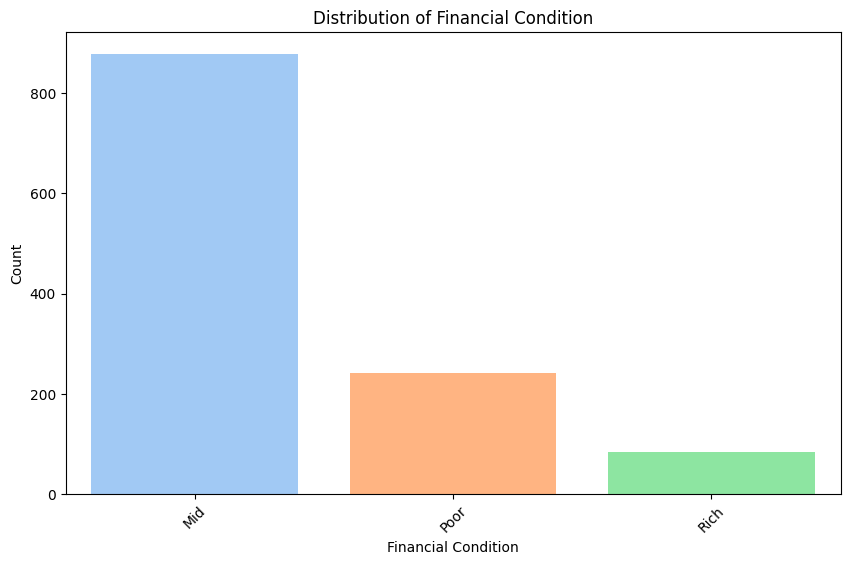

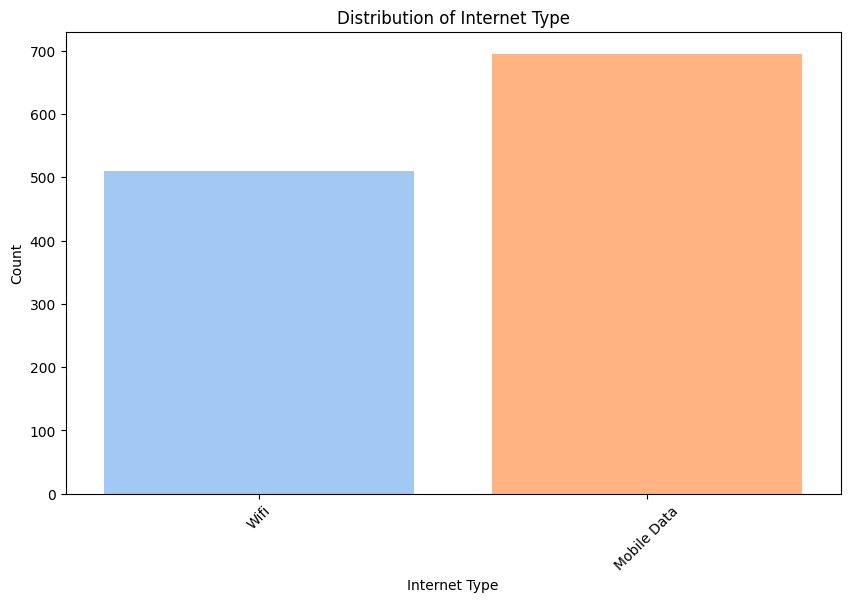

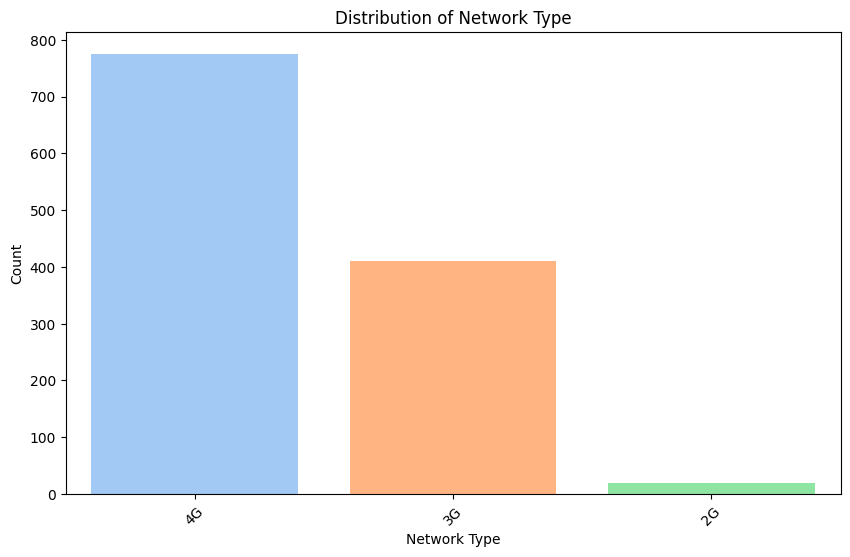

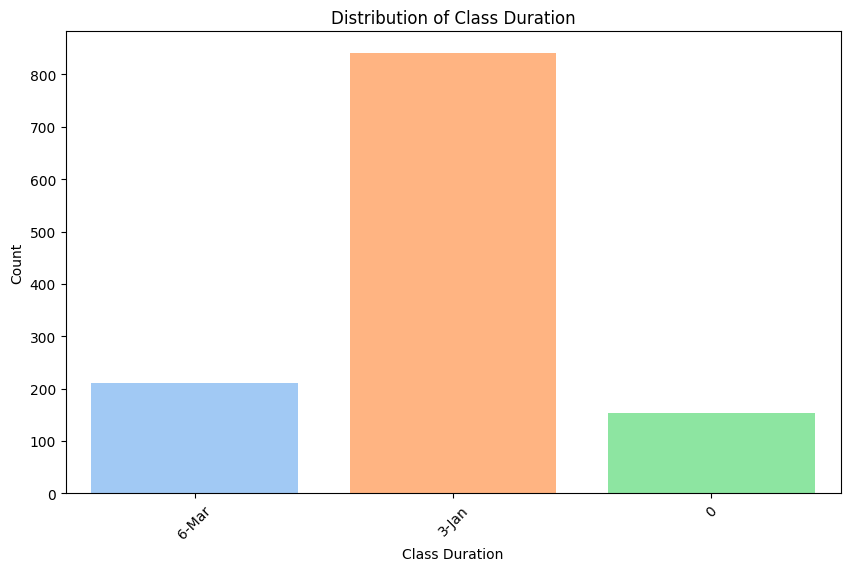

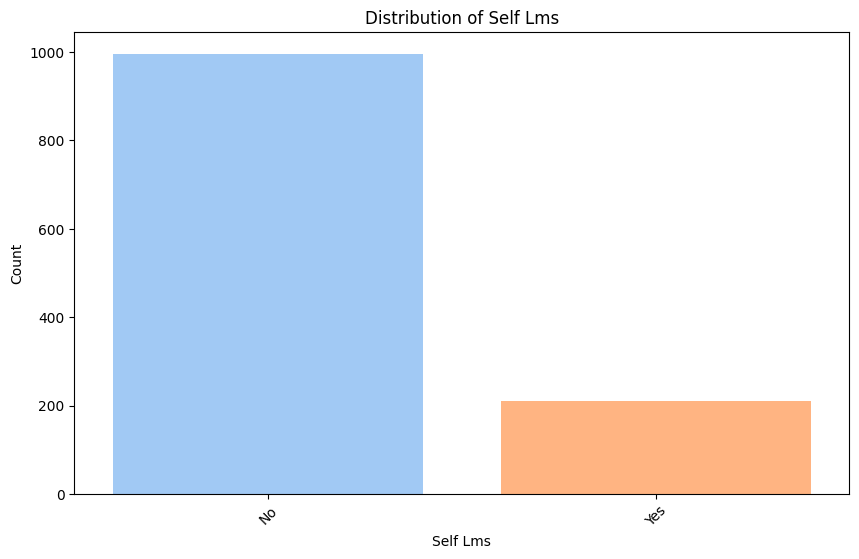

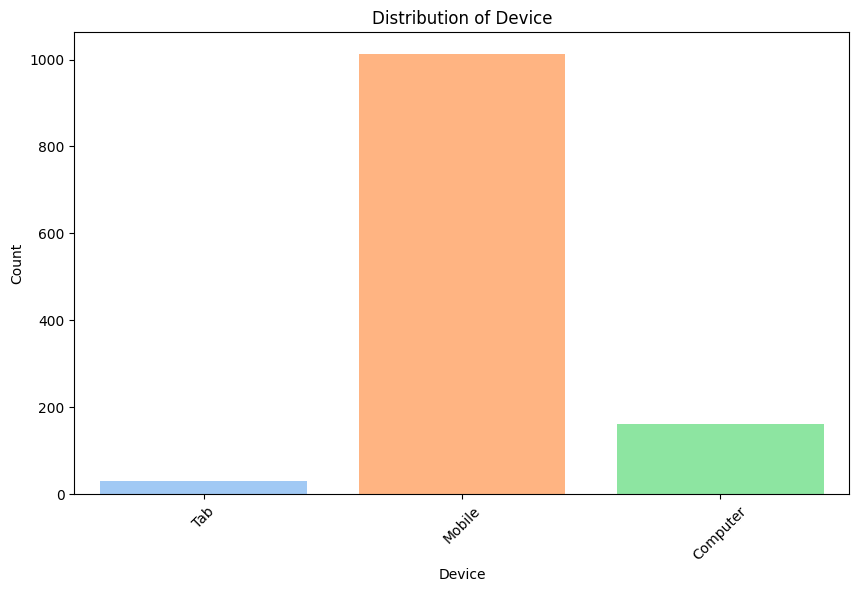

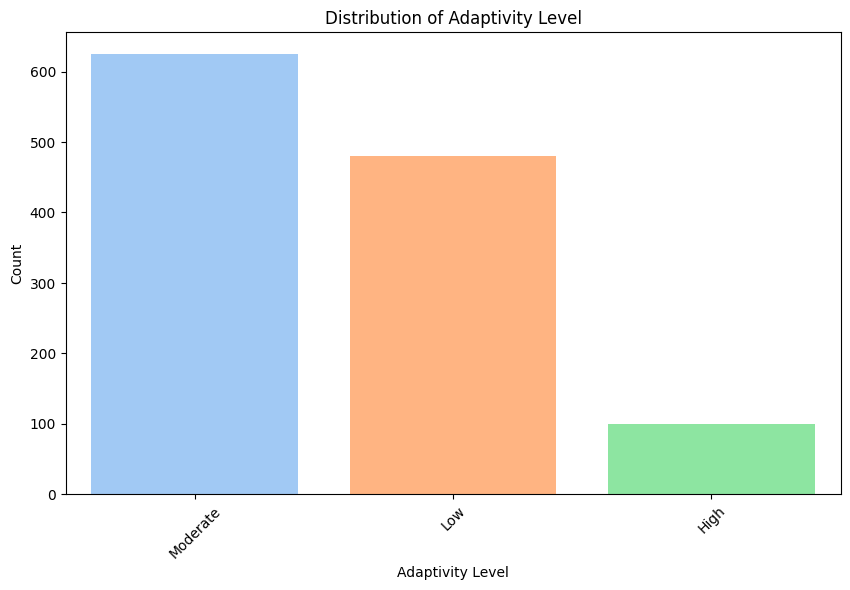

In [13]:
# Analyze categorical variables

# Visualize categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    colors = sns.color_palette('pastel')[0:len(df[col].unique())]
    for p, color in zip(plt.gca().patches, colors):
        p.set_facecolor(color)
    plt.title(f'Distribution of {col}')
    plt.show()


## Step 4: Data Preparation

#### Handle 'Age' descrepancies in column

In [14]:
# Remove objects from the 'Age' column

# Assuming 'Age' column contains mixed data, including "day-Month" entries.
# Remove rows where 'Age' contains strings that match "day-Month" pattern.

import re

def is_date_like(value):
  """Checks if a value resembles a date in 'day-Month' format."""
  if isinstance(value, str):
    return bool(re.match(r'\d{1,2}-[A-Za-z]{3}', value))
  return False

# Filter out rows with 'Age' values that look like dates
df = df[~df['Age'].apply(is_date_like)]

# Now 'df' will have rows where 'Age' doesn't resemble a date in 'day-Month' format.

print(df['Age'])

0       21-25
1       21-25
2       16-20
4       16-20
8       16-20
        ...  
1198    16-20
1199    21-25
1200    16-20
1201    16-20
1203    16-20
Name: Age, Length: 720, dtype: object


#### Handle 'Adaptivity Level' column

In [15]:
# Create a mapping to categorize 'Low' 'Moderate' and 'High' into a numberic
# value for further analysis.

adaptivity_mapping = {
    'Low': 1,
    'Moderate': 2,
    'High': 3
}

In [16]:
# Calculate proportion of adaptivity level
df['Adaptivity Level'].value_counts() / len(df)

,count
Adaptivity Level,
Moderate,0.480556
Low,0.443056
High,0.076389


## How students are adapting to online learning?

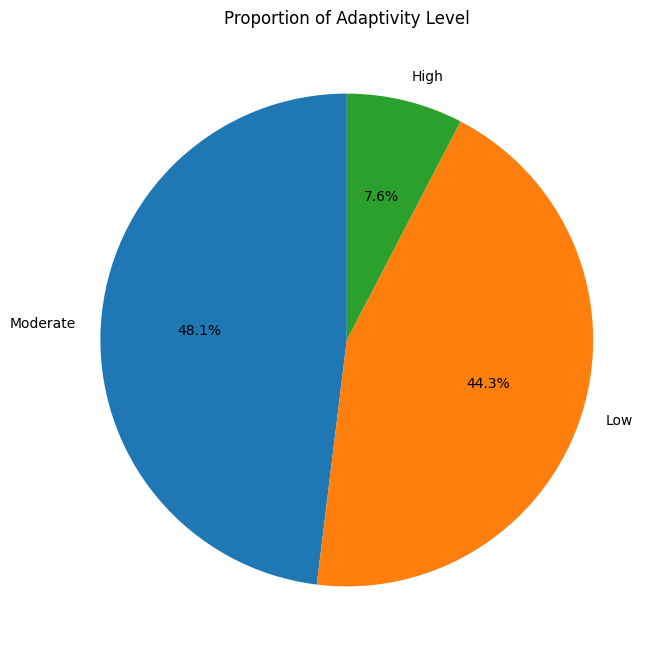

In [62]:
# Pie graph of proportion of adaptivity level

adaptivity_proportions = df['Adaptivity Level'].value_counts() / len(df)

plt.figure(figsize=(8, 8))
plt.pie(adaptivity_proportions, labels=adaptivity_proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Adaptivity Level')
plt.show()

A survey that contained 1,205 participants, only 7.6% highly adapted to online education. Those who performed moderately was 48.1% and 44.3% performed poorly.

## Different types of internet and network connections impact student satisfaction and adaptability?

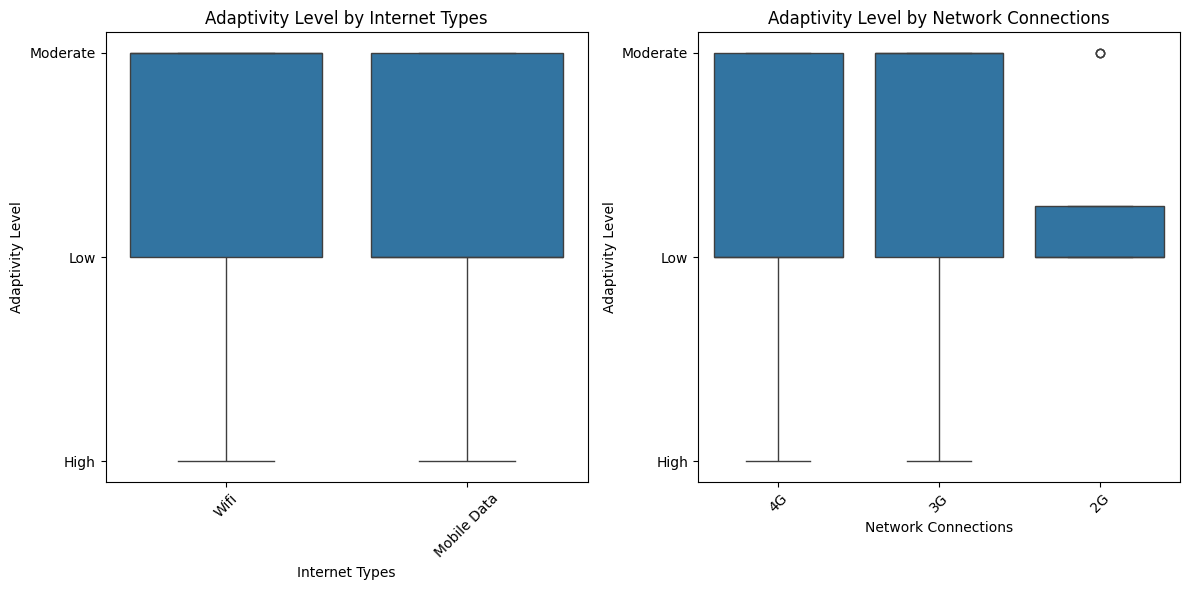

In [18]:
# Graph that compares 'Internet Types' and 'Network Connections' against
# 'Adaptivity Level'


# Create a figure and axes
plt.figure(figsize=(12, 6))

# Create a subplot for 'Internet Types' vs 'Adaptivity Level'
plt.subplot(1, 2, 1)
sns.boxplot(x='Internet Type', y='Adaptivity Level', data=df)
plt.title('Adaptivity Level by Internet Types')
plt.xlabel('Internet Types')
plt.ylabel('Adaptivity Level')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Create a subplot for 'Network Connections' vs 'Adaptivity Level'
plt.subplot(1, 2, 2)
sns.boxplot(x='Network Type', y='Adaptivity Level', data=df)
plt.title('Adaptivity Level by Network Connections')
plt.xlabel('Network Connections')
plt.ylabel('Adaptivity Level')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

No significant impact between adaptibility vs. internet and network types. Although, '2G' is representing Low Adaptability in 'Network Connections".

### Adaptibility vs. IT Students

In [19]:
# Create a mapping to categorize 'Yes' and 'No'into a numberic
# value for further analysis.

it_student_mapping = {
    'Yes': 1,
    'No': 0
}


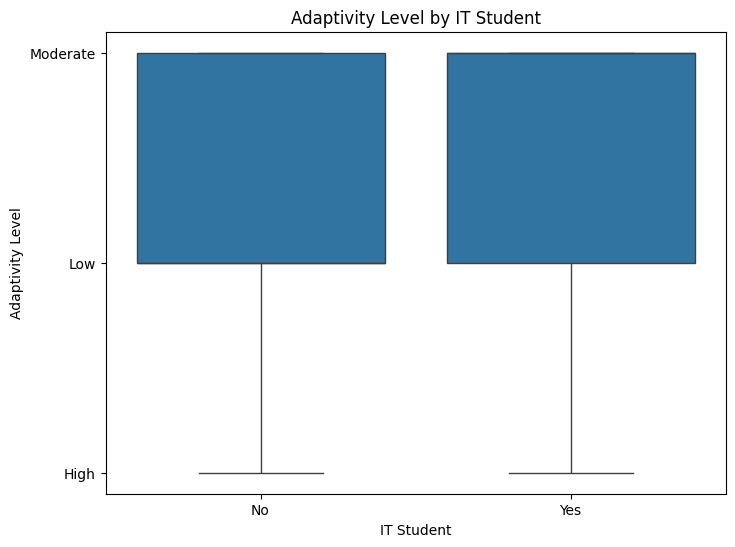

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'IT Student' column has 'Yes' and 'No' values

# Create a box plot to compare IT Student with Adaptivity Level
plt.figure(figsize=(8, 6))

# Filter out rows with NaN values in 'Adaptivity Level' and 'IT Student' columns
filtered_df = df.dropna(subset=['Adaptivity Level', 'IT Student'])

# Create the box plot
sns.boxplot(x='IT Student', y='Adaptivity Level', data=filtered_df)

plt.title('Adaptivity Level by IT Student')
plt.xlabel('IT Student')
plt.ylabel('Adaptivity Level')
plt.show()

In [21]:
# 1. Convert 'Adaptivity Level' to numeric representation
adaptivity_mapping = {
    'Low': 1,
    'Moderate': 2,
    'High': 3
}
df['Adaptivity Level Numeric'] = df['Adaptivity Level'].map(adaptivity_mapping)

# 2. Group by 'IT Student' and calculate the mean of the numeric 'Adaptivity Level'
adaptivity_by_it_student = df.groupby('IT Student')['Adaptivity Level Numeric'].mean()

print(adaptivity_by_it_student)

IT Student
No     1.530474
Yes    1.797834
Name: Adaptivity Level Numeric, dtype: float64


<ipython-input-21-86a9079d32db>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Adaptivity Level Numeric'] = df['Adaptivity Level'].map(adaptivity_mapping)


Adaptivity between IT Student and Non-IT Student supports that an IT Student is relatively more (not significant) adaptible to online learning vs. a non-IT student.

## Adaptivity by level of education?

---



<ipython-input-22-6828ea920e0e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Adaptivity Level Numeric'] = df['Adaptivity Level'].map(adaptivity_mapping)


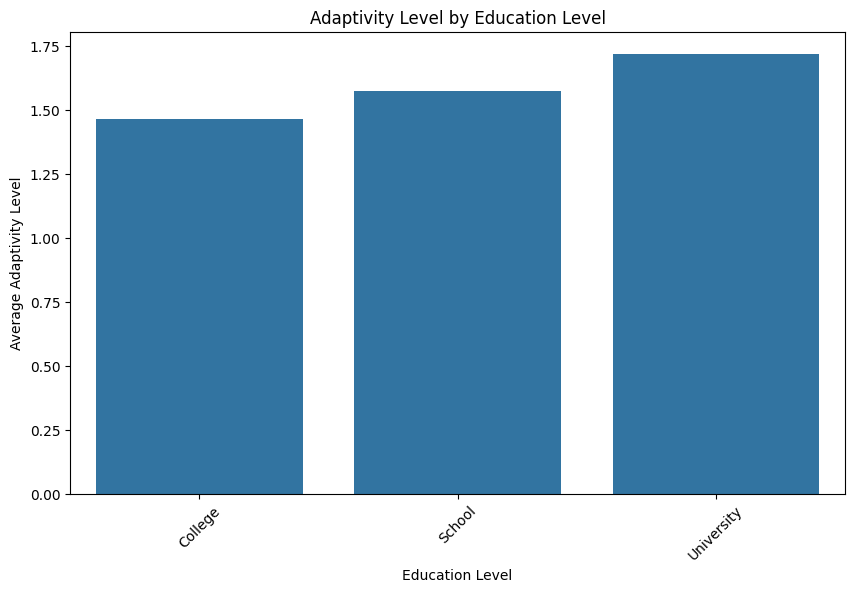

Education Level
College       1.465753
School        1.577778
University    1.719298
Name: Adaptivity Level Numeric, dtype: float64


In [22]:
# Adaptivity by Education Level

# 1. Convert 'Adaptivity Level' to numeric representation (if not already done)
adaptivity_mapping = {
    'Low': 1,
    'Moderate': 2,
    'High': 3
}
df['Adaptivity Level Numeric'] = df['Adaptivity Level'].map(adaptivity_mapping)

# 2. Group by 'Education Level' and calculate the mean of the numeric 'Adaptivity Level'
adaptivity_by_education = df.groupby('Education Level')['Adaptivity Level Numeric'].mean()

# 3. Create a bar plot to visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=adaptivity_by_education.index, y=adaptivity_by_education.values)
plt.xlabel('Education Level')
plt.ylabel('Average Adaptivity Level')
plt.title('Adaptivity Level by Education Level')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

# You can also print the results for a more detailed view
print(adaptivity_by_education)

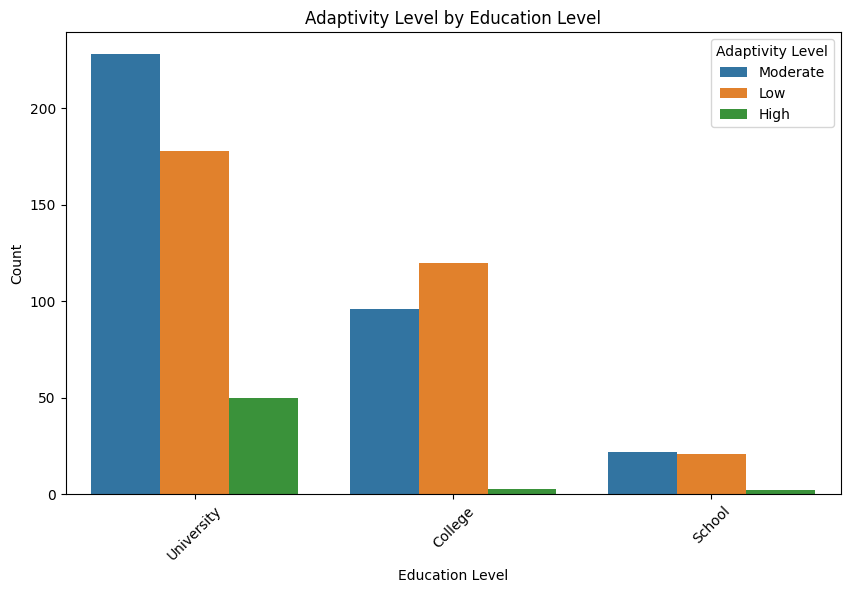

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot to show the adaptivity level based on education level
plt.figure(figsize=(10, 6))
sns.countplot(x='Education Level', hue='Adaptivity Level', data=df)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Adaptivity Level by Education Level')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='Adaptivity Level')
plt.show()


Based the bar graph that breaks down adaptivity level per education level, at a glance the University has the highest rate adaptivity.

## Institution type and the level of adaptivity

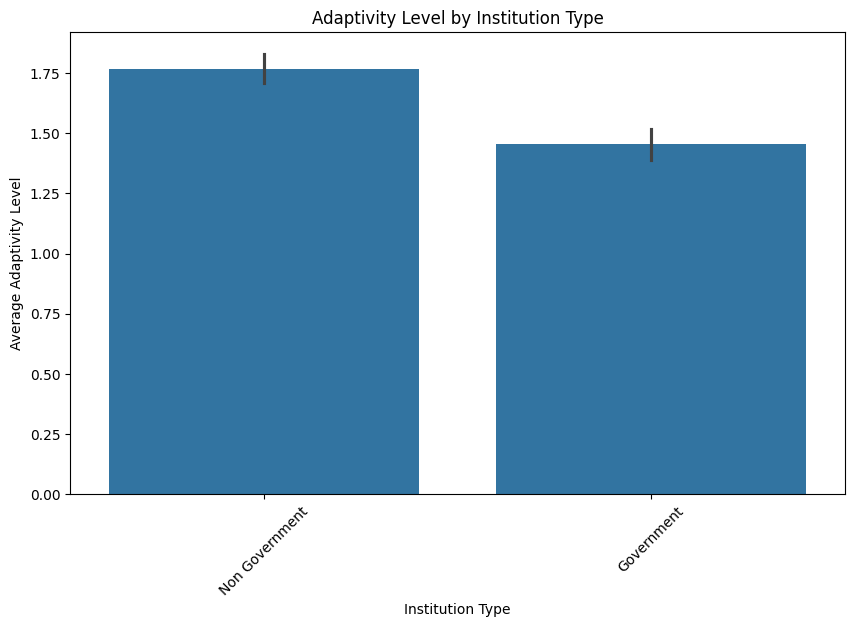

Institution Type
Government        1.454839
Non Government    1.768293
Name: Adaptivity Level Numeric, dtype: float64


In [24]:
# Compare Institution Type with Adaptivity Level with a bar graph

# bar plot to compare Institution Type with Adaptivity Level
plt.figure(figsize=(10, 6))
sns.barplot(x='Institution Type', y='Adaptivity Level Numeric', data=df)
plt.xlabel('Institution Type')
plt.ylabel('Average Adaptivity Level')
plt.title('Adaptivity Level by Institution Type')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

print(df.groupby('Institution Type')['Adaptivity Level Numeric'].mean())

Per my observation, the institution type does support that Non Government instutions tend to have a higher adaptivity level.

## What demographic factors are most strongly associated with adaptivity in online learning?

In [45]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


In [46]:
# 1. Convert 'Age' column to numerical representation:
#    a. Create a mapping for age ranges to numerical values:
age_mapping = {
    '16-20': 1,
    '21-25': 2,
    '26-30': 3,
    # Add more mappings as needed based on your data
}

#    b. Apply the mapping to the 'Age' column:
df['Age_Numeric'] = df['Age'].map(age_mapping)


# 2. Drop the original 'Age' column and other unnecessary columns:
X = df.drop(['Adaptivity Level', 'Adaptivity Level Numeric', 'Age'], axis=1)
y = df['Adaptivity Level Numeric']

Convert categorical features to numberical using Label Encoding

In [48]:
categorical_features = ['Gender', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device']
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])


Mapping 'Adaptivity Level' to numerical values

In [49]:
adaptivity_mapping = {
    'Low': 1,
    'Moderate': 2,
    'High': 3
}
df['Adaptivity Level Numeric'] = df['Adaptivity Level'].map(adaptivity_mapping)

Split data into training and testing sets

In [50]:
X = df.drop(['Adaptivity Level', 'Adaptivity Level Numeric'], axis=1)  # Features
y = df['Adaptivity Level Numeric']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Random Forest model

In [53]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


In [54]:
# Assuming 'Age' column has values like '16-20', '21-25', etc.
# Convert 'Age' column to numerical representation using Label Encoding
label_encoder = LabelEncoder()
df['Age_Encoded'] = label_encoder.fit_transform(df['Age'])


In [55]:
# Drop the original 'Age' column and other non-numeric columns
X = df.drop(['Adaptivity Level', 'Adaptivity Level Numeric', 'Age', # Add other non-numeric columns here
             'Gender', 'Education Level', 'Institution Type', 'IT Student', 'Location',
             'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type',
             'Class Duration', 'Self Lms'], axis=1)
y = df['Adaptivity Level Numeric']

In [56]:
# Drop rows with NaN in 'Adaptivity Level Numeric' before splitting
df = df.dropna(subset=['Adaptivity Level Numeric'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.5694444444444444
              precision    recall  f1-score   support

           1       0.62      0.57      0.60        70
           2       0.55      0.64      0.59        64
           3       0.20      0.10      0.13        10

    accuracy                           0.57       144
   macro avg       0.46      0.44      0.44       144
weighted avg       0.56      0.57      0.56       144



## Multiple linear regression

Assessing how well the independent variables collectively explain the variability in the other variables.

In [30]:
# Loading necessary libraries to perform multiple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#Import pandas and preprocessing libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [32]:
# Select features and target variable
X = df[['Gender', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding',
        'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device', 'Age']]  # Features
y = df['Adaptivity Level Numeric']  # Target variable

# Initialize LabelEncoder
le = LabelEncoder()

# Convert categorical features to numerical using Label Encoding
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])


<ipython-input-32-7d02fab89f41>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-32-7d02fab89f41>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-32-7d02fab89f41>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [26]:
# Select features and target variable
X = df[['Gender', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding',
        'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device', 'Age']]  # Features
y = df['Adaptivity Level Numeric']  # Target variable

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
#Create a linear regression model
model = LinearRegression()

In [35]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [38]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.2587580102482207
R-squared: 0.32252448225920394


In [39]:
# Coefficients for each variable in the linear regression model
print("Coefficients for each variable:")
for feature, coefficient in zip(X.columns, model.coef_):
    print(f"{feature}: {coefficient}")

Coefficients for each variable:
Gender: -0.20575842186607562
Education Level: -0.026660507564430252
Institution Type: 0.20240265465248092
IT Student: -0.03650433320463228
Location: 0.05742767335839569
Load-shedding: 0.05107844474611202
Financial Condition: 0.2512793513790662
Internet Type: -0.00673222484892326
Network Type: 0.22620841467088298
Class Duration: 0.20390933855200652
Self Lms: 0.3066633369196816
Device: -0.09421504261379565
Age: 0.055450973718619775
